In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import sys 
import math

In [2]:
data = np.loadtxt('/home/echeveste/mis_trabajos/correlation_f/data/data.dat')[:,:2]
rand = np.loadtxt('/home/echeveste/mis_trabajos/correlation_f/data/rand0.dat')[:,:2]

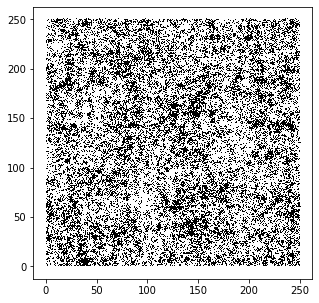

In [3]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[:,0],data[:,1],'k,')

In [4]:
tam = 30
x = [i for i in range(math.floor(np.min(data[:,0])),math.ceil(np.max(data[:,0]))+tam,tam)]
y = [i for i in range(math.floor(np.min(data[:,1])),math.ceil(np.max(data[:,1]))+tam,tam)]

In [5]:
x_ = math.ceil((math.ceil(np.max(data[:,0])) - math.floor(np.min(data[:,0])))/tam)
y_ = math.ceil((math.ceil(np.max(data[:,1])) - math.floor(np.min(data[:,1])))/tam)

In [6]:
mallas = []
for i in range(len(x)-1):
    for j in range(len(y)-1):
        mallas.append(data[(data[:,0]>x[i])&(data[:,0]<x[i+1])&(data[:,1]>y[j])&(data[:,1]<y[j+1])])

In [7]:
x_min = np.min(x)
y_min = np.min(y)
x_max = np.max(x)
y_max = np.max(y)

In [8]:
a = np.array([x for i in range(len(x))]).reshape(len(x)*len(x))
b = np.array([j for j in y for i in x])
cub = np.stack((a,b), axis=0).T

In [9]:
cub = cub[(cub[:,0]!=x_min)&(cub[:,0]!=x_max)&(cub[:,1]!=y_min)&(cub[:,1]!=y_max)]

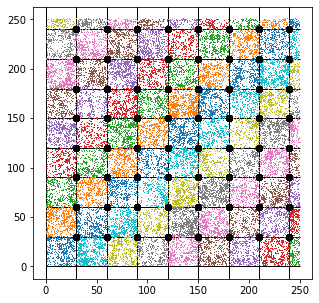

In [10]:
fig = plt.figure(figsize=(5,5))
for i in range(len(mallas)):
    plt.plot(mallas[i][:,0],mallas[i][:,1],',')
    plt.plot(cub[:,0],cub[:,1],'ko')
    if i <= 250/tam:
        plt.axvline(i*tam,ymin=0, ymax = 250, linewidth=1, color = 'k')
        plt.hlines(i*tam, xmin=0, xmax=250, linewidth=1, color = 'k')

In [11]:
cuad = []
lado = int(np.sqrt(len(mallas)))
for i in range(lado):
    for j in range(lado):
        cuad.append(np.array([[i*tam,j*tam],[(i+1)*tam,j*tam],[i*tam,(j+1)*tam],[(i+1)*tam,(j+1)*tam]]))

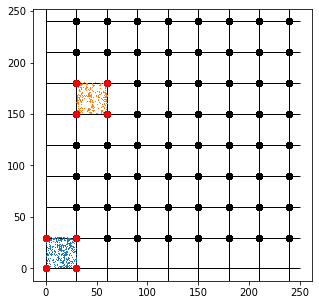

In [13]:
n = 0
m = 14
fig = plt.figure(figsize=(5,5))
for i in range(len(mallas)):
    plt.plot(mallas[n][:,0],mallas[n][:,1],',')
    plt.plot(mallas[m][:,0],mallas[m][:,1],',')
    plt.plot(cub[:,0],cub[:,1],'ko')
    plt.plot(cuad[n][:,0],cuad[n][:,1],'ro')
    plt.plot(cuad[m][:,0],cuad[m][:,1],'ro')
    if i <= 250/tam:
        plt.axvline(i*tam,ymin=0, ymax = 250, linewidth=1, color = 'k')
        plt.hlines(i*tam, xmin=0, xmax=250, linewidth=1, color = 'k')

# PRUEBA

In [31]:
def subdiv(data,tam):
    x = [i for i in range(math.floor(np.min(data[:,0])),math.ceil(np.max(data[:,0]))+tam,tam)]
    y = [i for i in range(math.floor(np.min(data[:,1])),math.ceil(np.max(data[:,1]))+tam,tam)]
    malla = []
    for i in range(len(x)-1):
        for j in range(len(y)-1):
            malla.append(data[(data[:,0]>x[i])&(data[:,0]<x[i+1])&(data[:,1]>y[j])&(data[:,1]<y[j+1])])
    
    cua_p = []
    lado = int(np.sqrt(len(malla)))
    for i in range(lado):
        for j in range(lado):
            cua_p.append(np.array([[i*tam,j*tam],[(i+1)*tam,j*tam],[i*tam,(j+1)*tam],[(i+1)*tam,(j+1)*tam]]))
    
    return malla,cua_p

In [26]:
def Histo_ani_XX(p,bn,point_max):
    
    # Iniciamos los arreglos los histogramas 
    NXX = np.zeros(bn)

    n = 0
    for ii in p:
        n = n+1
        # Histogramas XX
        s = ii-p[n:]
        dis, r = np.histogram(np.sqrt(s[:,0]**2+s[:,1]**2), bins=bn, range=(0, point_max))
        NXX = NXX + 2*dis
    return  NXX

In [27]:
def Histo_ani_XY(p,p_r,bn,point_max):
    NDR = np.zeros(bn)
    for ii in p:
        # Histogramas para DR
        s = ii-p_r
        dis, r = np.histogram(np.sqrt(s[:,0]**2+s[:,1]**2), bins=bn, range=(0, point_max))
        NDR = NDR + dis
    return NDR

In [28]:
def dis_min (p,p_r):
    dis = []
    for ii in p:
        # Histogramas para DR
        s = ii-p_r
        dis.append(np.min(np.sqrt(s[:,0]**2+s[:,1]**2)))
    
    return np.min(dis)

In [62]:
def Histo_mallas(data,tam,bn,point_max):
    
    malla_D, cua_p_D = subdiv(data,tam)
    
    NDD = np.zeros(bn)
    for i in range(len(malla_D)):
        NDD = NDD + Histo_ani_XX(malla_D[i],bn,point_max)
    
    for i in range(len(cua_p_D)-1):
        print(i)
        for j in range(i+1,len(cua_p_D)):
            
            if dis_min(cua_p_D[i],cua_p_D[j]) < point_max:
                NDD = NDD + Histo_ani_XY(malla_D[i],malla_D[j],bn,point_max)
    
    return NDD

In [63]:
tam = 30

start = time.perf_counter()

DD = Histo_mallas(data,tam,30,180)

finish = time.perf_counter()
print(f'Finializó en {round(finish-start,2)} segundos')

0
1
2
3
4
5


KeyboardInterrupt: 

In [579]:
DD

array([1528354., 1066014.,  449542.,  516670.,  509059.,  466641.,
        427378.,  399357.,  375313.,  353562.,  321235.,  292696.,
        285651.,  279215.,  269178.,  262086.,  258325.,  257983.,
        243329.,  236598.,  239345.,  237601.,  230281.,  215084.,
        196064.,  199427.,  190053.,  180771.,  176176.,  177900.])